# Linear Regression

In [12]:
%pylab
%matplotlib inline
%load_ext watermark

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.

In [4]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

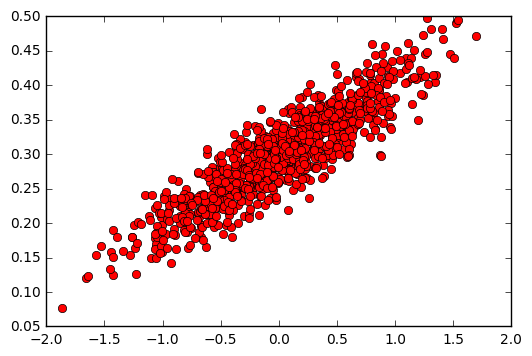

In [5]:
plt.plot(x_data, y_data, 'ro')
plt.show()

In [6]:
import tensorflow as tf

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [14]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 $learning rate$ 0.5인 $Gradient\ Decent$를 사용합니다.

In [15]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [16]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [-0.61865377] [ 0.31485018] 0.174686
1 [-0.37746844] [ 0.30917475] 0.0777683
2 [-0.21703607] [ 0.30547556] 0.0348862
3 [-0.11032031] [ 0.30301493] 0.0159127
4 [-0.03933558] [ 0.30137819] 0.00751771
5 [ 0.00788173] [ 0.30028945] 0.00380327
6 [ 0.03928956] [ 0.29956526] 0.00215978
7 [ 0.06018126] [ 0.29908356] 0.0014326


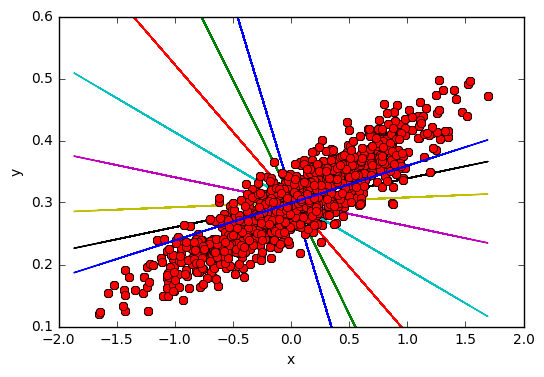

In [17]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')

# 모두의 머신러닝 부분 

In [2]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

# try to find values for w and b that compute y_data = W * x_data + b
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

 - hypothesis

In [3]:
hypothesis = w * x_data + b

### Simplified cost function

In [4]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

### minimize

In [5]:
a = tf.Variable(0.1)  # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

### before starting, initialize the variables

In [6]:
init = tf.initialize_all_variables()

### launch

In [9]:
# launch
sess = tf.Session()
sess.run(init)

# fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

# learns best fit is w: [1] b: [0]

0 0.264847 [ 0.5186165] [ 1.29497218]
20 0.0863835 [ 0.65864104] [ 0.77598917]
40 0.032638 [ 0.79017472] [ 0.47698221]
60 0.0123315 [ 0.87102532] [ 0.29318967]
80 0.00465918 [ 0.92072237] [ 0.18021671]
100 0.00176036 [ 0.95126992] [ 0.11077499]
120 0.000665116 [ 0.9700467] [ 0.06809076]
140 0.000251297 [ 0.98158848] [ 0.04185376]
160 9.49455e-05 [ 0.98868287] [ 0.02572647]
180 3.58738e-05 [ 0.9930436] [ 0.01581347]
200 1.3554e-05 [ 0.99572402] [ 0.00972016]
220 5.12109e-06 [ 0.99737167] [ 0.00597477]
240 1.93491e-06 [ 0.99838448] [ 0.00367257]
260 7.30998e-07 [ 0.99900699] [ 0.00225738]
280 2.76206e-07 [ 0.99938965] [ 0.00138755]
300 1.04352e-07 [ 0.99962485] [ 0.00085289]
320 3.94209e-08 [ 0.99976939] [ 0.00052426]
340 1.49078e-08 [ 0.99985826] [ 0.0003222]
360 5.62589e-09 [ 0.99991292] [ 0.00019807]
380 2.12611e-09 [ 0.99994648] [ 0.00012174]
400 8.03766e-10 [ 0.9999671] [  7.48206076e-05]
420 3.03866e-10 [ 0.99997973] [  4.60116935e-05]
440 1.1507e-10 [ 0.99998748] [  2.82574456e-05

## Placeholder

In [12]:
# data set
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

# try to find values for w and b that compute y_data = W * x_data + b
# range is -100 ~ 100
W = tf.Variable(tf.random_uniform([1], -10000., 10000.))
b = tf.Variable(tf.random_uniform([1], -10000., 10000.))

In [10]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

### hypothesis

In [13]:
# my hypothesis
hypothesis = W * X + b

### Simplified cost function

In [14]:
# Simplified cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

### minimize

In [15]:
# minimize
a = tf.Variable(0.1)  # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)  # goal is minimize cost

### before starting, initialize the variables

In [16]:
# before starting, initialize the variables
init = tf.initialize_all_variables()

### launch

In [17]:
# launch
sess = tf.Session()
sess.run(init)

# fit the line
for step in range(2001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

0 1.31605e+08 [ 264.03515625] [-12123.27050781]
20 5.93243e+06 [ 2027.95336914] [-5960.328125]
40 1.75871e+06 [ 1105.71728516] [-3245.06469727]
60 521385.0 [ 602.95184326] [-1766.87145996]
80 154569.0 [ 329.20602417] [-962.0256958]
100 45823.2 [ 180.15705872] [-523.8034668]
120 13584.7 [ 99.0029068] [-285.2003479]
140 4027.28 [ 54.8161087] [-155.28579712]
160 1193.92 [ 30.75729752] [-84.54995728]
180 353.947 [ 17.65776253] [-46.03573608]
200 104.931 [ 10.52533436] [-25.06552124]
220 31.1075 [ 6.64187098] [-13.64766693]
240 9.22208 [ 4.52740479] [-7.43087816]
260 2.73396 [ 3.37612081] [-4.04596281]
280 0.810505 [ 2.74926996] [-2.20294476]
300 0.240281 [ 2.40796232] [-1.19945872]
320 0.0712333 [ 2.22212744] [-0.65308106]
340 0.0211176 [ 2.12094378] [-0.35558942]
360 0.0062605 [ 2.06585145] [-0.19361119]
380 0.00185598 [ 2.03585505] [-0.10541735]
400 0.000550219 [ 2.01952219] [-0.05739767]
420 0.000163118 [ 2.01062942] [-0.03125192]
440 4.83561e-05 [ 2.00578737] [-0.01701605]
460 1.43362e

### Result of test

In [18]:
print(sess.run(hypothesis, feed_dict={X: 5}))
print(sess.run(hypothesis, feed_dict={X: 2.5}))

[ 10.]
[ 5.]
